Author: Geoff Boeing <br />
Web: http://geoffboeing.com/2015/03/chaos-theory-logistic-map/  <br />
Date: 2015-03-29 <br />
Description: This notebook demonstrates several ways to create Return Maps, or Poincaré Plots, to visualize system attractors and differentiate random noise from chaos. Return Maps embed 1-dimensional data (like time series) from a discrete dynamical system into 2- or 3-dimensional state space by plotting the value at time t vs the value at time t+1 (vs the value at time t+2, if it's a 3-D plot). I also show how to make animated GIFs to pan and zoom around the 3-D plots.

In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image as PIL_Image
from images2gif import writeGif
import glob
import IPython.display as IPdisplay

In [2]:
def logistic_model(generations=20, growth_rate_min=0.5, growth_rate_max=4.0, growth_rate_steps=7, pop_initial=0.5):
    growth_rate_min = float(growth_rate_min)
    growth_rate_max = float(growth_rate_max) - 0.0000000001
    growth_rates = np.arange(growth_rate_min, growth_rate_max, (growth_rate_max - growth_rate_min) / growth_rate_steps)
    pops = pd.DataFrame(columns=growth_rates, index=range(generations))
    pops.iloc[0] = pop_initial
    for rate in pops.columns:
        pop = pops[rate]
        for t in range(generations - 1):
            pop[t + 1] = pop[t] * rate * (1 - pop[t])
    return pops

In [3]:
def get_poincare_points(pops, discard_gens):
    """
    convert a dataframe of values from the logistic model into a set of xy points that
    you can plot as a poincare diagram
    """
    
    # drop the first row because every run has the same starting value, it leaves a visual artifact
    # drop the initial rows of the populations data, if specified by the argument
    if discard_gens > 0:
        discard_gens = np.arange(0, discard_gens)
        pops = pops.drop(labels=pops.index[discard_gens])
    li = []
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        
        # for each row in the column
        for label, row in pops.iterrows():
            
            # if this is not the last row in the column
            if label < len(pops)-1:
                
                # append the value at the current time (aka row) as the x and the value at t+1 as the y
                li.append((row[rate], pops[rate][label + 1]))
    
    # convert the xy list of values to a dataframe and return
    return pd.DataFrame(li, columns=['x', 'y'])

In [4]:
def get_poincare_points_3d(pops, discard_gens):
    """
    convert a dataframe of values from the logistic model into a set of xyz points that
    you can plot as a 3-D return map
    """
    
    # drop the first row because every run has the same starting value, it leaves a visual artifact
    # drop the initial rows of the populations data, if specified by the argument
    if discard_gens > 0:
        discard_gens = np.arange(0, discard_gens)
        pops = pops.drop(labels=pops.index[discard_gens])
    li = []
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        
        # for each row in the column
        for label, row in pops.iterrows():
            
            # if this is not the 2nd to last row in the column
            if label < len(pops)-2:
                
                # append the value at the current time (aka row) as x, t+1 as y, and t+2 as z
                li.append((row[rate], pops[rate][label + 1], pops[rate][label + 2]))
    
    # convert the xy list of values to a dataframe and return
    return pd.DataFrame(li, columns=['x', 'y', 'z'])

In [5]:
def poincare_plot(pops, xmin=0, xmax=1, ymin=0, ymax=1, discard_gens=1, title=u'Poincaré Plot', marker='', size=3):
    """
    plot the results of the logistic model as a poincaré plot
    """
    
    # first get the xy points to plot
    points = get_poincare_points(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    # plot the xy data
    poincare_scatter = ax.scatter(points['x'], points['y'], c='r', edgecolor='', alpha=1, s=size)

    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('t + 1')

    plt.show()

In [6]:
def poincare_plot_3d(pops, xmin=0, xmax=1, ymin=0, ymax=1, zmin=0, zmax=1,
                     discard_gens=1, title=u'Poincaré Plot', marker='', size=3):
    """
    plot the results of the logistic model as a poincaré plot
    """
    
    # first get the xyz points to plot
    points = get_poincare_points_3d(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca(projection='3d')

    # plot the xy data
    poincare_scatter = ax.scatter(points['x'], points['y'], points['z'], marker='.', c='m', edgecolor='m', s=5, alpha=0.1)

    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    #ax.set_title(title)
    ax.set_xlabel('t')
    ax.set_ylabel('t + 1')
    ax.set_zlabel('t + 2')

    plt.show()

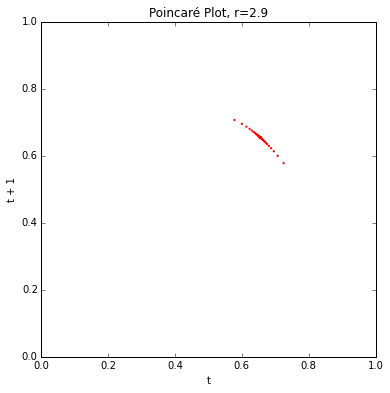

In [7]:
# draw a poincare plot for 100 generations for the growth rate parameter 2.9
# it shows points converging on 0.655 because the logistic map has a fixed-point attractor at 0.655 when r=2.9
generations = 100
growth_rate_min = 2.9
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, title=u'Poincaré Plot, r=2.9', size=5)

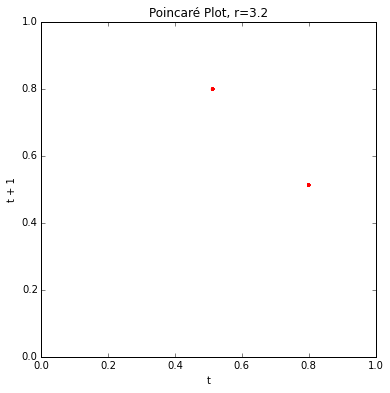

In [8]:
# draw a poincare plot for 100 generations for the growth rate parameter 3.2
# it shows 2 points because the logistic map has a period of 2 when r=3.2
generations = 100
growth_rate_min = 3.2
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, title=u'Poincaré Plot, r=3.2', size=10)

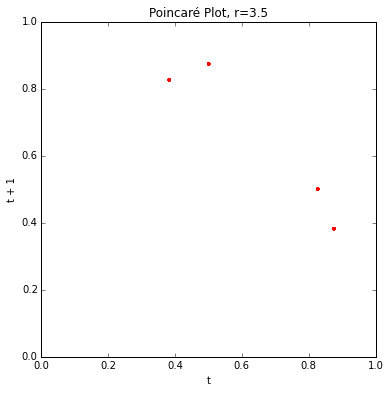

In [9]:
# draw a poincare plot for 100 generations for the growth rate parameter 3.5
# it shows 4 points because the logistic map has a period of 4 when r=3.5
generations = 100
growth_rate_min = 3.5
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, title=u'Poincaré Plot, r=3.5', size=10)

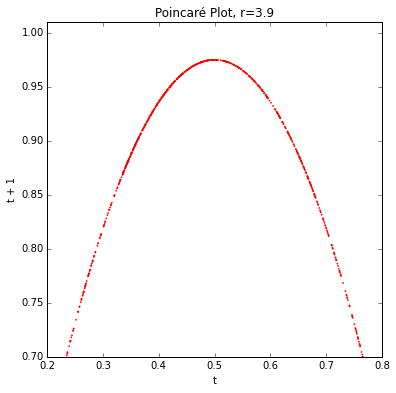

In [10]:
# draw a poincare plot for 2,000 generations for the growth rate parameter 3.9
# the plot reveals the strange attractor - the logistic map is chaotic when r=3.9
generations = 2000
growth_rate_min = 3.9
growth_rate_max = 4.0
growth_rate_steps = 1
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, xmin=0.2, xmax=0.8, ymin=0.7, ymax=1.01, title=u'Poincaré Plot, r=3.9')

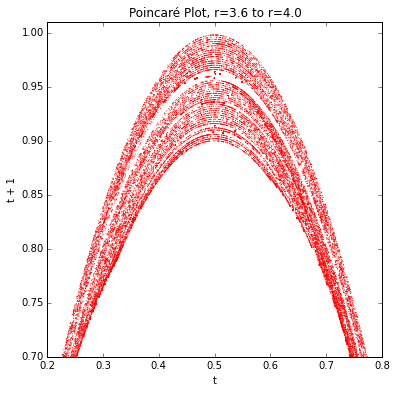

In [11]:
# draw a poincare plot for 1,000 generations across 50 growth rate steps from 3.6 to 4.0
# each chaotic growth rate has its own parabola
generations = 1000
growth_rate_min = 3.6
growth_rate_max = 4.0
growth_rate_steps = 50
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
poincare_plot(pops, xmin=0.2, xmax=0.8, ymin=0.7, ymax=1.01, size=1, title=u'Poincaré Plot, r=3.6 to r=4.0')

In [12]:
# generate two time series of 1000 steps, one chaotic and one random
gens = 30000
chaos_pops = logistic_model(gens, 3.999, 4.0, 1)
chaos_pops = chaos_pops.iloc[gens-1000:].reset_index().drop(labels='index', axis=1)
random_pops = pd.DataFrame([random.random() for _ in range(0, 1000)], columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']
time_series.iloc[900:905]

,chaos,random
900,0.627054,0.674773
901,0.9351953,0.530639
902,0.2423597,0.434719
903,0.7343024,0.735935
904,0.7802145,0.133423


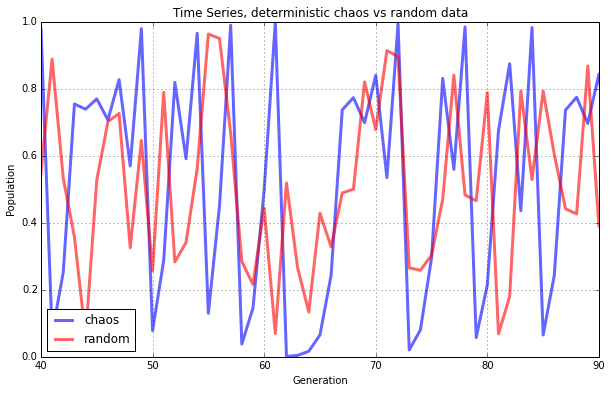

In [13]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
ax = time_series.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['b-','r-'])
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Time Series, deterministic chaos vs random data')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(loc=3, frameon=True, framealpha=1)
plt.show()

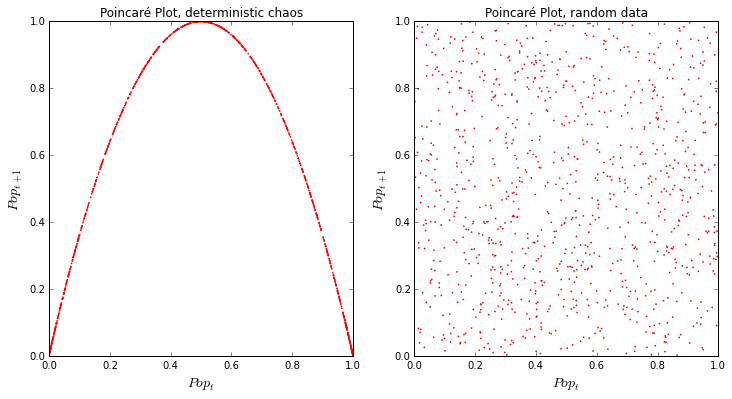

In [14]:
# now show these two time series side-by-side as Poincare Plots to show how to differentiate them

# first, get poincare points such that (x, y) = (pop at time t, pop at time t+1)
chaos_points = get_poincare_points(chaos_pops, 1)
rand_points = get_poincare_points(random_pops, 1)

# create a new matplotlib figure with side-by-side axes and set its size
fig, _ = plt.subplots()
fig.set_size_inches(12, 6)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# on one axis, plot the chaotic time series, on the other plot the random one
chaos_scatter = ax1.scatter(chaos_points['x'], chaos_points['y'], c='r', edgecolor='', alpha=1, s=3)
rand_scatter = ax2.scatter(rand_points['x'], rand_points['y'], c='r', edgecolor='', alpha=1, s=3)

# set x and y limits, title, and x and y labels
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)  
ax1.set_title(u'Poincaré Plot, deterministic chaos')
ax2.set_title(u'Poincaré Plot, random data')  
xlabel = '$Pop_t$'
ylabel = '$Pop_{t+1}$'
font_size = 14
ax1.set_xlabel(xlabel, fontsize=font_size)
ax1.set_ylabel(ylabel, fontsize=font_size)
ax2.set_xlabel(xlabel, fontsize=font_size)
ax2.set_ylabel(ylabel, fontsize=font_size)

plt.show()

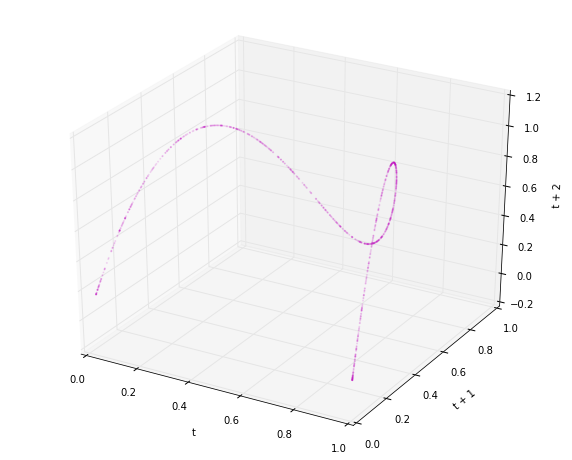

In [15]:
# the strange attractor is even more interesting when it's plotted in a 3-D Poincare plot
# embed the 1-D time series data in 3-D state space by plotting pop at time t vs t+1 vs t+2
pops = logistic_model(1000, 3.99, 4, 1)
poincare_plot_3d(pops)

In [16]:
# now show the 3-D plot as an animated gif
# run the logistic model for 1000 generations for the growth rate parameter 3.99
r = 3.99
xyz = get_poincare_points_3d(logistic_model(1000, r, 4, 1), 1)

# create the figure and axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatterplot the data in 3-D
ax.scatter(xyz['x'], xyz['y'], xyz['z'], s=3, marker='o', facecolors='m', edgecolors='m', alpha=0.1, depthshade=True)

# remove all ticks
ax.tick_params(reset=True, axis='both', which='both', pad=0, width=0, length=0,
               bottom='off', top='off', left='off', right='off', 
               labelbottom='off', labeltop='off', labelleft='off', labelright='off')

# create 36 frames for the animated gif
steps = 36
gif_filename = 'demo-pan-rotate-zoom'

# a viewing perspective is composed of an elevation, distance, and azimuth
# define the range of values for the distance of the viewing perspective
min_dist = 7.
max_dist = 10.
dist_range = np.arange(min_dist, max_dist, (max_dist-min_dist)/steps)

# define the range of values for the elevation of the viewing perspective
min_elev = 10.
max_elev = 60.
elev_range = np.arange(max_elev, min_elev, (min_elev-max_elev)/steps)

# pan down, rotate around, and zoom out
for azimuth in range(0, 360, 360/steps):
    ax.azim = float(azimuth)
    ax.elev = elev_range[int(azimuth/(360./steps))]
    ax.dist = dist_range[int(azimuth/(360./steps))]
    fig.suptitle('elev=' + str(round(ax.elev,1)) + ', azim=' + str(round(ax.azim,1)) + ', dist=' + str(round(ax.dist,1)))
    plt.savefig('images/' + gif_filename + '/img' + str(azimuth).zfill(3) + '.png')
    
# don't display the static plot
plt.close()

# create an animated gif of all the 3-D plot perspectives then display it inline
images = [PIL_Image.open(image) for image in glob.glob('images/' + gif_filename + '/*.png')]
file_path_name = 'images/' + gif_filename + '.gif'
writeGif(file_path_name, images, duration=0.2)
IPdisplay.Image(url=file_path_name)

In [17]:
# show the 3-D plot as an animated gif
# run the logistic model for 1000 generations for the growth rate parameter 3.99
r = 3.99
xyz = get_poincare_points_3d(logistic_model(1000, r, 4, 1), 1)

# create the figure and axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatterplot the data in 3-D
ax.scatter(xyz['x'], xyz['y'], xyz['z'], s=3, marker='o', facecolors='m', edgecolors='m', alpha=0.1, depthshade=True)

# set axis labels and remove all ticks
ax.set_xlabel('t',  labelpad=0)
ax.set_ylabel('t + 1',  labelpad=0)
ax.set_zlabel('t + 2',  labelpad=0)
ax.tick_params(reset=True, axis='both', which='both', pad=0, width=0, length=0,
               bottom='off', top='off', left='off', right='off', 
               labelbottom='off', labeltop='off', labelleft='off', labelright='off')

# configure the initial viewing perspective to look straight down at the x-y plane
ax.elev = 89.9
ax.azim = 270.1
ax.dist = 10.0

# filename for the animated gif
gif_filename = 'logistic-3d-return-map'

# sweep the perspective down and rotate to reveal the 3-D structure of the strange attractor
for n in range(0, 75):
    if n > 10 and n < 27:
        ax.elev = ax.elev-1.5
    if n > 26 and n < 31:
        ax.elev = ax.elev-2
        ax.azim = ax.azim+0.5
    if n > 30 and n < 51:
        ax.elev = ax.elev-1.5
        ax.azim = ax.azim+1
    if n > 50 and n < 55:
        ax.elev = ax.elev-0.7
        ax.azim = ax.azim+1
    if n > 54 and n < 66:
        ax.azim = ax.azim+1
        
    # add a figure title to each plot then save the figure to the disk
    fig.suptitle('Return Map in 3D state space, r=' + str(r), fontsize=12, x=0.5, y=0.85)
    plt.savefig('images/' + gif_filename + '/img' + str(n).zfill(3) + '.png', bbox_inches='tight')

# don't display the static plot
plt.close()

# create an animated gif of all the 3-D plot perspectives then display it inline
images = [PIL_Image.open(image) for image in glob.glob('images/' + gif_filename + '/*.png')]
file_path_name = 'images/' + gif_filename + '.gif'
writeGif(file_path_name, images, duration=0.1)
IPdisplay.Image(url=file_path_name)